In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Calculate limb darkening coefficients

First... some imports!

In [21]:
from ExoCTK.ExoCTK import core
from ExoCTK.ExoCTK.limb_dark import ldcfit as lf
from ExoCTK.ExoCTK.limb_dark import ldcplot as lp

To calculate the limb darkening coefficients, we need a model grid. 

I'm going to use the Phoenix ACES models for this example but any grid can be loaded into a `core.ModelGrid()` object if the spectra are stored as FITS files.

We will pass a directory or directory+wildcard path to the initialize the model grid.

In [22]:
fits_files = '../../../limb_dark_jeff/limb/specint/lte*.PHOENIX-ACES-AGSS-COND-SPECINT-2011.fits'
grid = core.ModelGrid(fits_files)
print(grid.data)

 Teff  logg ...                          filename                         
------ ---- ... ----------------------------------------------------------
2300.0  4.0 ... lte02300-4.00+0.5.PHOENIX-ACES-AGSS-COND-SPECINT-2011.fits
2300.0  4.0 ... lte02300-4.00-0.0.PHOENIX-ACES-AGSS-COND-SPECINT-2011.fits
2300.0  4.0 ... lte02300-4.00-0.5.PHOENIX-ACES-AGSS-COND-SPECINT-2011.fits
2300.0  4.5 ... lte02300-4.50+0.5.PHOENIX-ACES-AGSS-COND-SPECINT-2011.fits
2300.0  4.5 ... lte02300-4.50-0.0.PHOENIX-ACES-AGSS-COND-SPECINT-2011.fits
2300.0  4.5 ... lte02300-4.50-0.5.PHOENIX-ACES-AGSS-COND-SPECINT-2011.fits
2300.0  5.0 ... lte02300-5.00+0.5.PHOENIX-ACES-AGSS-COND-SPECINT-2011.fits
2300.0  5.0 ... lte02300-5.00-0.0.PHOENIX-ACES-AGSS-COND-SPECINT-2011.fits
2300.0  5.0 ... lte02300-5.00-0.5.PHOENIX-ACES-AGSS-COND-SPECINT-2011.fits
2300.0  5.5 ... lte02300-5.50+0.5.PHOENIX-ACES-AGSS-COND-SPECINT-2011.fits
   ...  ... ...                                                        ...
2800.0  4.5 ... lte02800-

Now let's customize it to our desired effective temperature, surface gravity, metallicity, and wavelength ranges by running the `customize()` method on our grid.

In [23]:
grid.customize(Teff_rng=(2500,2600), logg_rng=(5,5.5), FeH_rng=(-0.5,0.5), wave_rng=(1.1,1.6))

12/89 spectra in parameter range Teff: (2500, 2600) , logg: (5, 5.5) , FeH: (-0.5, 0.5) , wavelength: (1.1, 1.6)


Now we can caluclate the limb darkening coefficients. 

We just need to specify the desired effective temperature, surface gravity, metallicity, and the function to fit to the limb darkening profile (including 'uniform', 'linear', 'quadratic', 'square-root', 'logarithmic', 'exponential', and 'nonlinear').

We can do this with for a single model on the grid...

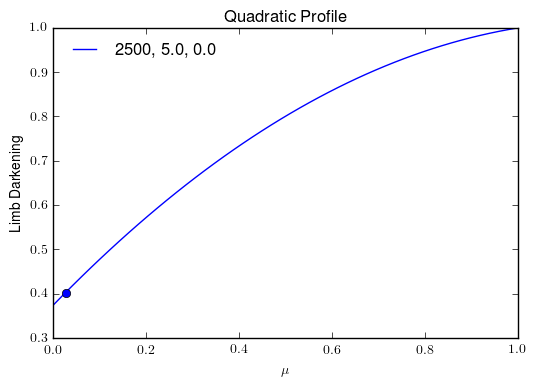

In [24]:
teff, logg, FeH = 2500, 5.0, 0.0
coeffs, mu, radius = lf.ldc(teff, logg, FeH, grid, 'quadratic', plot=True)

...or a single model off the grid...

Teff: 2532  logg: 5.1  FeH: 0.0  model not in grid. Calculating...


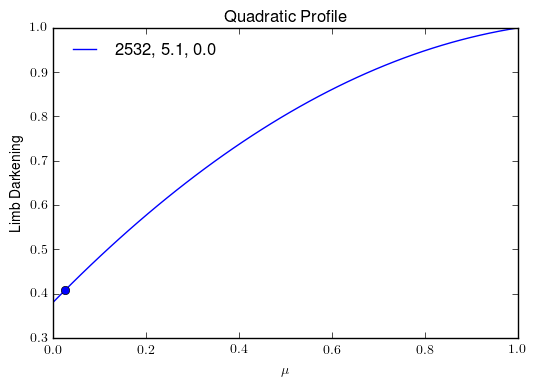

In [25]:
teff, logg, FeH = 2532, 5.1, 0.0
coeffs, mu, radius = lf.ldc(teff, logg, FeH, grid, 'quadratic', plot=True)

...or the entire grid!

In [ ]:
coeff_grid, mu_grid, radius_grid = lf.ldc_grid(grid, 'quadratic', write_to='', plot=True)

Alternatively, the results can be written to a FITS file with COEFFS, MU, and RADII extensions by specifying a filepath with the `write_to` argument.

Enjoy!